<a href="https://colab.research.google.com/github/tathi-martins/Alura-Bootcamp---Ci-ncia-de-Dados-Aplicada-2/blob/main/Desafios_da_Aula_05_M%C3%B3dulo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Criando o ambiente.**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import matplotlib._color_data as mcd
import locale

In [16]:
dados = pd.read_csv('/content/A172121189_28_143_208.csv', encoding='ISO 8859-1', skiprows=3, skipfooter=12, sep = ';', thousands='.', 
decimal=',')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [17]:
colunas_usaveis = dados.mean().index.tolist() # Transforma a linha que contém os meses em index e os coloca/transforma em uma lista (listas são mutáveis, index não são)
colunas_usaveis.insert(0, 'Unidade da Federação')

usaveis = dados[colunas_usaveis]

#Transformando a coluna 'Unidade da Federação' em índice, desta forma, eliminando o índice numérico (que vai de 0 até 26).
usaveis = usaveis.set_index('Unidade da Federação')

#Ordenando os gastos do mais alto ao mais baixo (quem gastou mais):
estados_que_gastaram_mais = usaveis.sort_values('Total', ascending=False)  # sort_values por padrão ordena do mais baixo ao mais alto, ascending=False ordena do mais alto ao mais baixo.
estados_que_gastaram_mais = estados_que_gastaram_mais.drop('Total', axis=1) # Retirando a coluna Total
estados_que_gastaram_mais.head() # Os 5 estados que mais gastaram

colunas_analisaveis = estados_que_gastaram_mais.columns[6:] # Slice por posição, para isso precisa pegar as colunas.
estados_que_gastaram_mais = estados_que_gastaram_mais[colunas_analisaveis]

pernambuco = estados_que_gastaram_mais.loc['26 Pernambuco',]
sao_paulo = estados_que_gastaram_mais.loc['35 São Paulo',]

estados_que_gastaram_mais = estados_que_gastaram_mais / 1000000 # Dividindo os valores do eixo y por 1000000 transforma os valores em milhões
meses_filtrados = estados_que_gastaram_mais.columns[47:150]
mes_mais_recente = estados_que_gastaram_mais.columns[-1]
gastos_do_mais_recente = estados_que_gastaram_mais[mes_mais_recente]


#**Resolução dos desafios da aula 05.**

**Desafio 01: Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.**

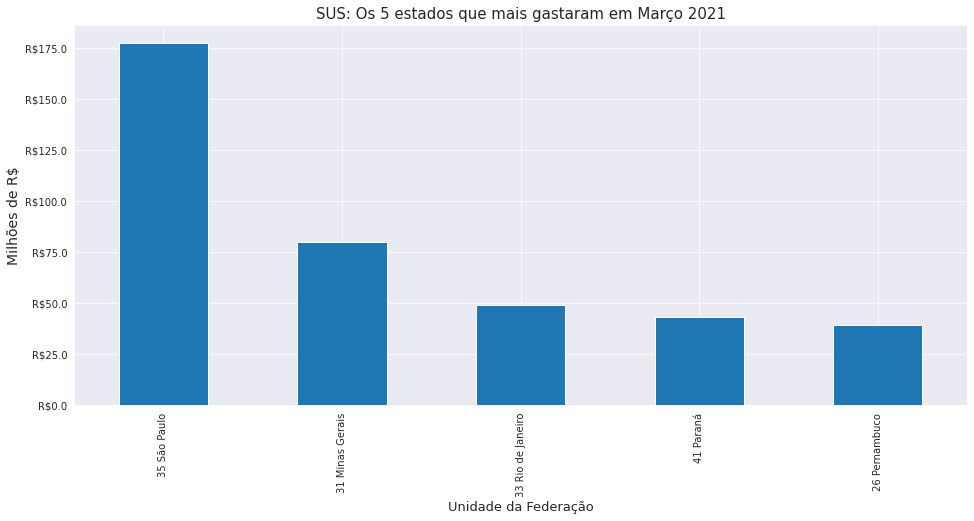

In [23]:
# Criando o gráfico
ax = gastos_do_mais_recente.sort_values(ascending=False).head().plot(kind='bar', figsize=(16, 7))

# Criando o estilo da grade do gráfico
sns.set_style('darkgrid')

# Criando o título
plt.title('SUS: Os 5 estados que mais gastaram em Março 2021', fontsize='15')

# Criando os labels
plt.xlabel('Unidade da Federação', fontsize=13)
plt.ylabel('Milhões de R$', fontsize=14)

# Configurando o eixo y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x}'))

plt.show()

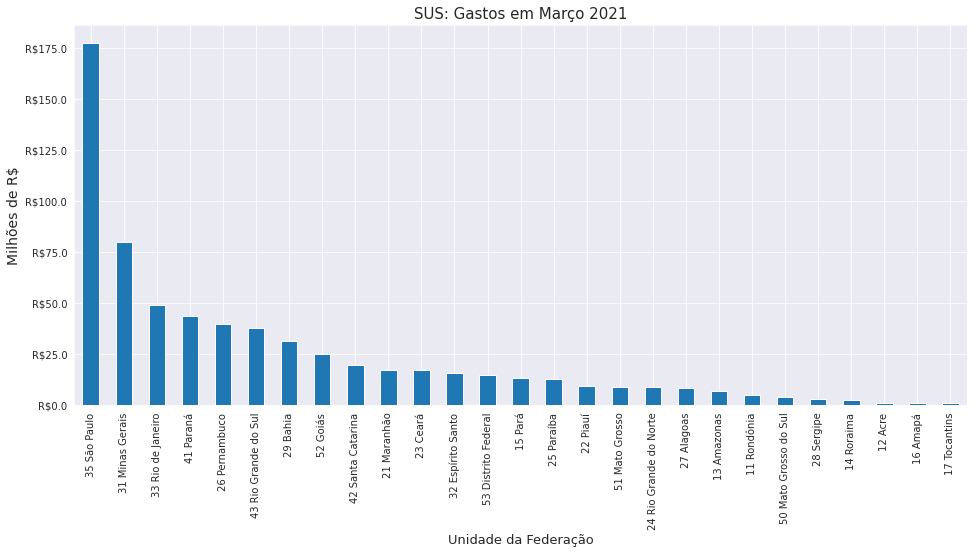

In [19]:
plt.rcParams.update({
    'axes.formatter.use_locale' : True,
})

gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False) # Ordem descrescente
ax = gastos_do_mais_recente.plot(kind='bar', figsize=(16,7))
sns.set_style('darkgrid')

# Criando o estilo da grade do gráfico
sns.set_style('darkgrid')

# Criando o título
plt.title('SUS: Gastos em Março 2021', fontsize='15')

# Criando os labels
plt.xlabel('Unidade da Federação', fontsize=13)
plt.ylabel('Milhões de R$', fontsize=14)

# Configurando o eixo y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x}'))

plt.show()

**Desafio 02: Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado ou qualquer outro de seu interesse.**

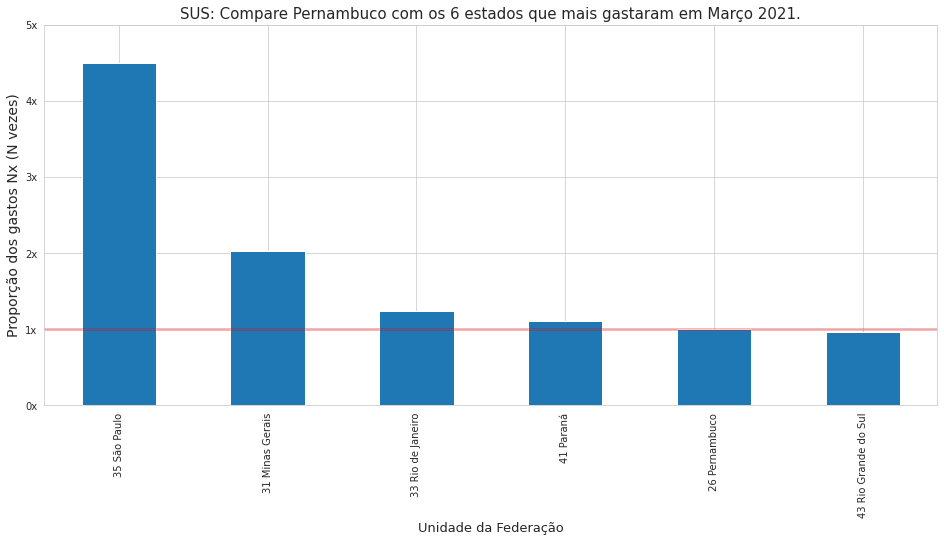

In [26]:
# Criando o gráfico
ax = (gastos_do_mais_recente / gastos_do_mais_recente.loc['26 Pernambuco']).sort_values(ascending=False).head(6).plot(kind='bar', figsize=(16,7))

# Criando o estilo da grade do gráfico
sns.set_style('whitegrid')

# Criando o título
plt.title('SUS: Compare Pernambuco com os 6 estados que mais gastaram em Março 2021.', fontsize='15')

# Criando os labels
plt.xlabel('Unidade da Federação', fontsize=13)
plt.ylabel('Proporção dos gastos Nx (N vezes)', fontsize=14)

# Configurando o eixo y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}x'))
plt.ylim(0, 5) # Determinando o limite mínimo e o máximo do eixo y.
plt.axhspan(0.99, 1.01, color='r', alpha=0.2)

plt.show()

**Desafio 03: Fazer o cálculo proporcional à população do seu estado e mais um da sua escolha.**

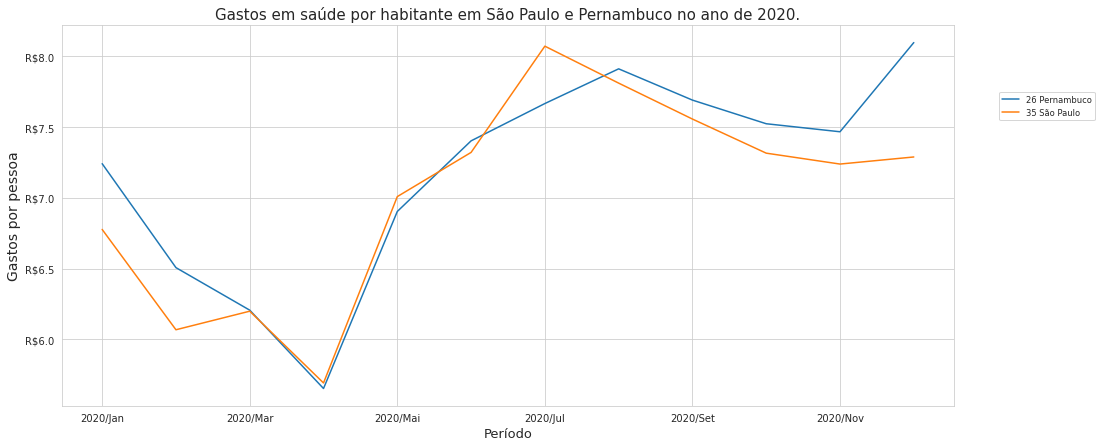

In [21]:
plt.rcParams.update({
    'axes.formatter.use_locale' : True,
})

gasto_per_capita_pernambuco = pernambuco[-15:-3] / 9616621
gasto_per_capita_sao_paulo = sao_paulo[-15:-3] / 44840384

# Criando o gráfico
ax1 = gasto_per_capita_pernambuco.plot(figsize=(16, 7))
ax2 = gasto_per_capita_sao_paulo.plot(figsize=(16, 7))

# Criando o título
plt.title('Gastos em saúde por habitante em São Paulo e Pernambuco no ano de 2020.', fontsize='15')

# Criando os labels
plt.xlabel('Período', fontsize=13)
plt.ylabel('Gastos por pessoa', fontsize=14)

# Configurando o eixo y
ax1,ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x}'))

# Criando legendas
ax1.legend(fontsize='small', loc=(1.05, 0.75)) # Coloca a legenda do lado de fora do gráfico
ax2.legend(fontsize='small', loc=(1.05, 0.75))

plt.show()

#**Desafio 04: Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.**

Conclusão: Apesar dos gastos em saúde pública do estado de São Paulo ser 4 vezes maior do que o de Pernambuco, como mostrado nas análises feitas neste notebook, isto não se reflete necessariamente em gastos proporcionais à sua população, ao contrário, os gastos per capita de São Paulo são menores do que Pernambuco. São Paulo não é o único estado nesta situação entretanto, outros estados com alta densidade populacional e índice de desenvolvimento elevado em relação a média do país, mas com baixo gasto per capita são: Mato Grosso, Santa Catarina e Rio Grande do Sul.

Este fato vem sendo observado ao longo dos anos, outros estudos estatísticos feitos no passado já vinham indicando um valor inferior de investimentos em saúde (comparados a Pernambuco) em outras áreas da saúde como: saúde da família, combate à dengue, agentes comunitários de saúde proporcionais à população e leitos por habitantes. Os resultados desses investimentos tem sido refletidos em menores índices de incidência de dengue por habitante comparados a São Paulo, porém ainda temos que melhorar em outros parâmetros como incidência de tuberculose por habitante, índice de longevidade e IDH. O que resultadria em uma melhor qualidade de vida da população pernambucana.

Porém, de acordo com este estudo: [Gasto público com saúde per capita (pags 246 e 247)](http://tabnet.datasus.gov.br/tabdata/livroidb/2ed/CapituloE.pdf) a região Sudeste é a campeã, enquanto que a região Nordeste está em último lugar.


**Mais reflexão sobre o tema:**

**Gastos com saúde cada vez menores.**

Historicamente, o Brasil tem investido na saúde pública bem menos do que outros países que possuem sistema público de saúde, de acordo com dados da OMS, e drásticamente menos do que seria necessário para manter um serviço de qualidade aos seus usuários. [Fonte1](https://portal.cfm.org.br/artigos/gastos-com-saude-cada-vez-menores/), [Fonte2](https://noticias.uol.com.br/colunas/jamil-chade/2020/10/30/mesmo-com-sus-27-dos-gastos-com-saude-no-brasil-saem-do-bolso-do-cidadao.htm), [Fonte3](https://agenciabrasil.ebc.com.br/saude/noticia/2020-10/setor-publico-gasta-r-383-capita-por-dia-com-saude-diz-cfm)

Em 2016 os estados, municípios e a União gastaram em média 3,00 reais ao dia por cada habitante. Se desconsiderarmos os recursos federais, ou seja, apenas os estados e municípios o valor cai para menos de R$ 2,00 em média. [Fonte](https://portal.cfm.org.br/noticias/contrastes-marcam-quadro-nacional-de-gastos-em-saude/)

Avançando para 2019, o Brasil gasta em média 3,83 reais ao dia com a saúde de cada habitante. Em 12 anos as unidades federativas não aumentaram os investimentos e gastos em saúde de forma significativa, o indicador continua na casa dos 3 reais, mesmo com demandas crescentes da população, impulsionadas por mudanças nos perfis socioeconômico e epidemiológico. Pelo cálculo feito pelo CFM a partir dos dados oficiais, o gasto anual por habitante com saúde no país foi de R$ 1.398,53 em 2019, quantia levemente acima dos 1.382,29 registrados em 2018, quando o gasto per capita diário ficou em 3,79 reais. [Fonte1](https://portal.cfm.org.br/noticias/brasil-gasta-r-383-ao-dia-com-a-saude-de-cada-habitante-2/)

[Fonte2](https://agenciabrasil.ebc.com.br/saude/noticia/2020-10/setor-publico-gasta-r-383-capita-por-dia-com-saude-diz-cfm)

As informações levantadas pelo CFM, com a consultoria da ONG Contas Abertas, consideraram as despesas em Ações e Serviços Públicos de Saúde (ASPS) declaradas no Sistema de Informações sobre os Orçamentos Públicos em Saúde (Siops), do Ministério da Saúde. Embora o número absoluto tenha aumentado ao longo dos 12 anos, algo em torno de R$ 85,8 bilhões, o valor continua abaixo de parâmetros internacionais.

Outros indicadores e fontes:

https://portal.cfm.org.br/images/PDF/percapita2014cfm.pdf

http://tabnet.datasus.gov.br/tabdata/livroidb/2ed/CapituloE.pdf

https://portalhospitaisbrasil.com.br/brasil-gasta-r-383-ao-dia-com-a-saude-de-cada-habitante/